In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score, \
    classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


import matplotlib.pylab as plt
# import xgboost as xgb

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
path = 'ColonTumor/colonTumor.data'

In [3]:
data = pd.read_csv(path,delimiter=',',header=None)

In [4]:
data.head()
y = data[data.columns[-1]]
X = data[data.columns[:-1]]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [6]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))



Number of mislabeled points out of a total 31 points : 16


In [7]:
# xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)

In [8]:
def pp(ff):
    clf_selected = make_pipeline(
            SelectKBest(f_classif, k=3), MinMaxScaler(),ff()
    )
    y_pred = clf_selected.fit(X_train, y_train).predict(X_test)
    return y_pred

In [9]:
print('Gaussian:',f1_score(y_test,pp(GaussianNB),average='macro'))
print('DecisionTreeClassifier:',f1_score(y_test,pp(DecisionTreeClassifier),average='macro'))
print('RandomForestClassifier:',f1_score(y_test,pp(RandomForestClassifier),average='macro'))
# print('XGBClassifier:',f1_score(y_test,pp(xgb_model),average='macro'))
print('SVM:',f1_score(y_test,pp(svm.SVC),average='macro'))

Gaussian: 0.6585067319461444
DecisionTreeClassifier: 0.6352941176470588
RandomForestClassifier: 0.6630434782608696
SVM: 0.6868686868686869


In [10]:
gaussian = ('Gaussian',f1_score(y_test,pp(GaussianNB),average='macro'),accuracy_score(y_test,pp(GaussianNB)))
desicion = ('DecisionTreeClassifier',f1_score(y_test,pp(DecisionTreeClassifier),average='macro'),accuracy_score(y_test,pp(DecisionTreeClassifier)))
randomForest = ('RandomForestClassifier',f1_score(y_test,pp(RandomForestClassifier),average='macro'),accuracy_score(y_test,pp(RandomForestClassifier)))
sv = ('SVM',f1_score(y_test,pp(svm.SVC),average='macro'),accuracy_score(y_test,pp(svm.SVC)))


In [11]:
f1 = [i[1] for i in [gaussian,desicion,randomForest,sv]]
acc = [i[2] for i in [gaussian,desicion,randomForest,sv]]
names = [i[0] for i in [gaussian,desicion,randomForest,sv]]

In [12]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [13]:
plt.style.use('fivethirtyeight')
# plt.bar([gaussian,desicion,randomForest,sv])
# plt.legend(f1)
# plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

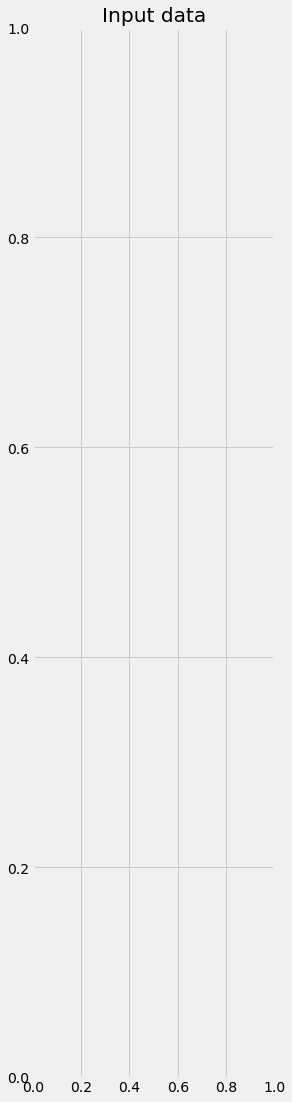

In [15]:


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB


h = .02  # step size in the mesh

f1_scores ={}
accuracies = {}
recalls = {}
precisions = {}
names = ["Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest",
         "Naive Bayes"]

classifiers = [
    svm.SVC(kernel="linear"),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    GaussianNB()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [(X,y)
            ]

figure = plt.figure(figsize=(27, 18))
i = 1
# iterate over datasets
    # preprocess dataset, split into training and test part

X = StandardScaler().fit_transform(X)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

# iterate over classifiers
for name, _clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf = make_pipeline(SelectKBest(f_classif,k='all'),_clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    ppp =clf.predict(X_test)
    f1_scores[name] = f1_score(y_test,ppp)
    accuracies[name] = accuracy_score(y_test,ppp)
    recalls[name] = recall_score(y_test,ppp)
    precisions[name] = precision_score(y_test,ppp)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1
print(f1_scores)
print(precisions)
print(recalls)
print(accuracies)
plt.tight_layout()
plt.show()

In [17]:
scores = {'F1 Scores':f1_scores,'Precisions':precisions,'Recalls':recalls,'Accuracies':accuracies}

{}
{}
{}
{}


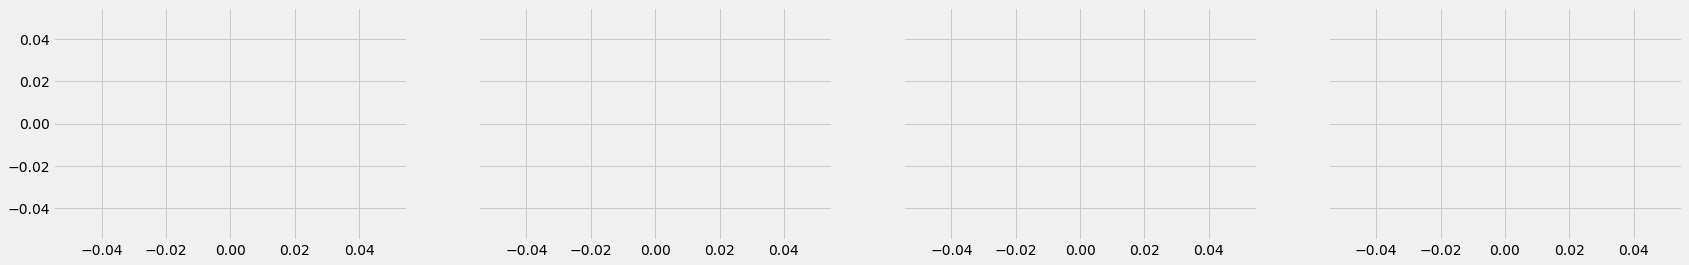

In [18]:
fig, axs = plt.subplots(1, 4, figsize=(26, 4), sharey=True)
for i,score in enumerate(scores):
    # ax[i].title('F1 Scores')
    print(scores[score])
    axs[i].bar(scores[score].keys(),scores[score].values())